In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163694 sha256=97032e0d308e88d4e630ced20e1b318435d4c6231c240b51e8a668f0a56a7bae
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
import numpy as np
import pandas as pd
from surprise import Dataset,Reader
from surprise import SVD,SVDpp,NMF,NormalPredictor,BaselineOnly,KNNBasic
from surprise.model_selection import train_test_split,cross_validate
from surprise import accuracy
import matplotlib.pyplot as plt

In [ ]:
csv_file_path_1 = '/content/drive/MyDrive/Major_Project/Utility_Matrices/Utility_Matrix_5000_1.csv'
df_user = pd.read_csv(csv_file_path_1,index_col=0)
df_user.head()

,Manali,Leh Ladakh,Coorg,Andaman,Lakshadweep,Goa,Udaipur,Srinagar,Gangtok,Munnar,...,Bikaner,Shimoga (Shivamogga),Hogenakkal,Gir National Park,Kasauli,Pushkar,Chittorgarh,Nahan,Lavasa,Poovar
Users,,,,,,,,,,,,,,,,,,,,,
user_0,2.0,2.0,1.0,3.0,5.0,1.0,5.0,5.0,1.0,4.0,...,5.0,3.0,5.0,1.0,4.0,4.0,3.0,3.0,4.0,4.0
user_1,4.0,2.0,2.0,2.0,3.0,3.0,2.0,2.0,1.0,1.0,...,3.0,5.0,4.0,3.0,3.0,2.0,2.0,1.0,2.0,5.0
user_2,4.0,1.0,5.0,5.0,1.0,5.0,5.0,1.0,2.0,5.0,...,1.0,4.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,3.0
user_3,1.0,4.0,1.0,5.0,4.0,4.0,2.0,4.0,5.0,5.0,...,4.0,5.0,3.0,2.0,2.0,1.0,2.0,1.0,1.0,4.0
user_4,3.0,4.0,5.0,1.0,5.0,2.0,4.0,5.0,3.0,5.0,...,4.0,1.0,4.0,1.0,3.0,1.0,3.0,3.0,4.0,2.0


In [ ]:
df_user = df_user.fillna(0)
df_user.head()

,Manali,Leh Ladakh,Coorg,Andaman,Lakshadweep,Goa,Udaipur,Srinagar,Gangtok,Munnar,...,Bikaner,Shimoga (Shivamogga),Hogenakkal,Gir National Park,Kasauli,Pushkar,Chittorgarh,Nahan,Lavasa,Poovar
Users,,,,,,,,,,,,,,,,,,,,,
user_0,2.0,2.0,1.0,3.0,5.0,1.0,5.0,5.0,1.0,4.0,...,5.0,3.0,5.0,1.0,4.0,4.0,3.0,3.0,4.0,4.0
user_1,4.0,2.0,2.0,2.0,3.0,3.0,2.0,2.0,1.0,1.0,...,3.0,5.0,4.0,3.0,3.0,2.0,2.0,1.0,2.0,5.0
user_2,4.0,1.0,5.0,5.0,1.0,5.0,5.0,1.0,2.0,5.0,...,1.0,4.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,3.0
user_3,1.0,4.0,1.0,5.0,4.0,4.0,2.0,4.0,5.0,5.0,...,4.0,5.0,3.0,2.0,2.0,1.0,2.0,1.0,1.0,4.0
user_4,3.0,4.0,5.0,1.0,5.0,2.0,4.0,5.0,3.0,5.0,...,4.0,1.0,4.0,1.0,3.0,1.0,3.0,3.0,4.0,2.0


In [ ]:
df_user_mod = df_user.reset_index().melt(id_vars='Users', var_name='location', value_name='raw_rating')
df_user_mod.columns = ['user', 'location', 'ratings']

df_user_mod.head()

,user,location,ratings
0,user_0,Manali,2.0
1,user_1,Manali,4.0
2,user_2,Manali,4.0
3,user_3,Manali,1.0
4,user_4,Manali,3.0


In [ ]:
reader = Reader(rating_scale=(1, 5))

# Load the DataFrame into a Surprise Dataset
data = Dataset.load_from_df(df_user_mod[['user', 'location', 'ratings']], reader)
data

In [ ]:
g = data.df
g.tail(10)

,user,location,ratings
499990,user_4990,Poovar,2.0
499991,user_4991,Poovar,5.0
499992,user_4992,Poovar,4.0
499993,user_4993,Poovar,1.0
499994,user_4994,Poovar,2.0
499995,user_4995,Poovar,5.0
499996,user_4996,Poovar,3.0
499997,user_4997,Poovar,5.0
499998,user_4998,Poovar,3.0
499999,user_4999,Poovar,1.0


In [ ]:

trainset, testset = train_test_split(data, test_size=.2)



In [ ]:
svd = SVD(n_factors=200,n_epochs=50,lr_all = 0.0001)

# Train the algorithm on the training set
svd.fit(trainset)

# Make predictions on the test set
predictions = svd.test(testset)

# Compute and print RMSE (Root Mean Squared Error)
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)

RMSE: 1.4207
MAE:  1.2203


In [ ]:
predictions[:5]

[Prediction(uid='user_1950', iid='Visakhapatnam', r_ui=4.0, est=2.983869239450593, details={'was_impossible': False}),
 Prediction(uid='user_3371', iid='Srinagar', r_ui=3.0, est=2.9747030915067123, details={'was_impossible': False}),
 Prediction(uid='user_312', iid='Varkala', r_ui=3.0, est=2.947701763279626, details={'was_impossible': False}),
 Prediction(uid='user_770', iid='Kochi', r_ui=5.0, est=2.8780581414535162, details={'was_impossible': False}),
 Prediction(uid='user_1851', iid='Tirupati', r_ui=1.0, est=3.077211097797227, details={'was_impossible': False})]

In [ ]:
results = cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Print the results
for metric in ['test_rmse', 'test_mae']:
    print(f"{metric}: {results[metric].mean():.4f}")

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.4187  1.4194  1.4182  1.4211  1.4177  1.4190  0.0012  
MAE (testset)     1.2180  1.2188  1.2176  1.2213  1.2174  1.2186  0.0014  
Fit time          28.02   24.19   25.42   25.72   26.12   25.89   1.24    
Test time         1.32    1.03    1.01    0.98    0.97    1.06    0.13    
test_rmse: 1.4190
test_mae: 1.2186


In [ ]:
parts = csv_file_path_1.split('/')
file_1 = parts[len(parts)-1]
den_parts = file_1.split('_')
density_str = den_parts[len(den_parts)-1]
density_f = float(density_str[:-4])
print(density_f)

1.0


In [ ]:
performance_density = pd.DataFrame(columns = ['Density','RMSE','MAE'])
performance_density

,Density,RMSE,MAE


In [ ]:

new_data = {'Density':density_f , 'RMSE':results['test_rmse'].mean() , 'MAE':results['test_mae'].mean()}
performance_density = performance_density.append(new_data, ignore_index=True)

performance_density

<ipython-input-146-f9cbc88bfc4c>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_density = performance_density.append(new_data, ignore_index=True)


,Density,RMSE,MAE
0,0.1,1.225714,1.100604
1,0.2,1.416701,1.201519
2,0.3,1.585744,1.310095
3,0.4,1.722080,1.470018
4,0.5,1.807302,1.599886
5,0.6,1.839857,1.634412
6,0.7,1.819014,1.601559
7,0.8,1.749215,1.536891
8,0.9,1.620198,1.403917
9,1.0,1.419017,1.218617


In [ ]:
performance_density_final = performance_density
performance_density_final['Density'] = 100 * performance_density_final['Density']
performance_density_final.columns = ['Density of data in percentage','Avg. RMSE','Avg. MAE']
performance_density_final

,Density of data in percentage,Avg. RMSE,Avg. MAE
0,10.0,1.225714,1.100604
1,20.0,1.416701,1.201519
2,30.0,1.585744,1.310095
3,40.0,1.722080,1.470018
4,50.0,1.807302,1.599886
5,60.0,1.839857,1.634412
6,70.0,1.819014,1.601559
7,80.0,1.749215,1.536891
8,90.0,1.620198,1.403917
9,100.0,1.419017,1.218617


from matplotlib import pyplot as plt
performance_density['Density of data in percentage'].plot(kind='hist', bins=20, title='Density of data in percentage')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
performance_density['Avg. RMSE'].plot(kind='hist', bins=20, title='Avg. RMSE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
performance_density['Avg. MAE'].plot(kind='hist', bins=20, title='Avg. MAE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
performance_density.plot(kind='scatter', x='Density of data in percentage', y='Avg. RMSE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
performance_density.plot(kind='scatter', x='Avg. RMSE', y='Avg. MAE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Density of data in percentage']
  ys = series['Avg. RMSE']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = performance_density.sort_values('Density of data in percentage', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Density of data in percentage')
_ = plt.ylabel('Avg. RMSE')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Density of data in percentage']
  ys = series['Avg. MAE']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = performance_density.sort_values('Density of data in percentage', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Density of data in percentage')
_ = plt.ylabel('Avg. MAE')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Density of data in percentage']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Density of data in percentage'}, axis=1)
              .sort_values('Density of data in percentage', ascending=True))
  xs = counted['Density of data in percentage']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = performance_density.sort_values('Density of data in percentage', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Density of data in percentage')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
performance_density['Density of data in percentage'].plot(kind='line', figsize=(8, 4), title='Density of data in percentage')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
performance_density['Avg. RMSE'].plot(kind='line', figsize=(8, 4), title='Avg. RMSE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
performance_density['Avg. MAE'].plot(kind='line', figsize=(8, 4), title='Avg. MAE')
plt.gca().spines[['top', 'right']].set_visible(False)

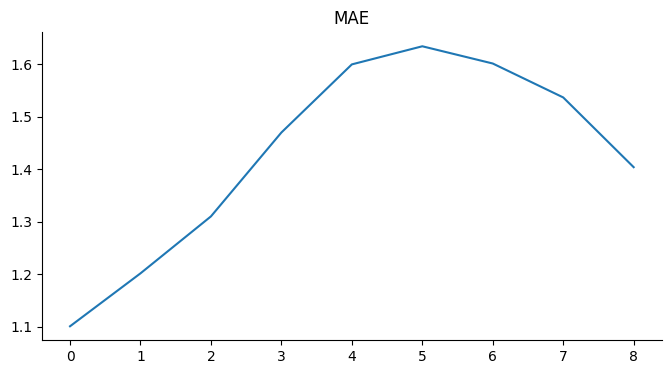

In [ ]:
from matplotlib import pyplot as plt
performance_density['MAE'].plot(kind='line', figsize=(8, 4), title='MAE')
plt.gca().spines[['top', 'right']].set_visible(False)

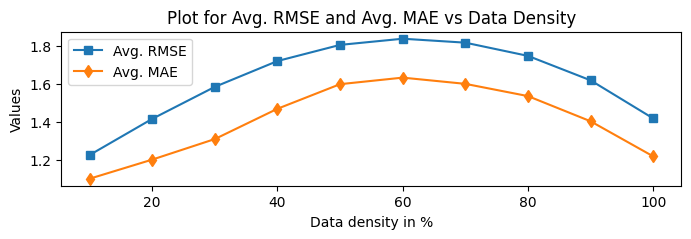

In [ ]:
df_plot = performance_density_final
plt.figure(figsize=(8, 2))  # Optional: Set the figure size
plt.plot(df_plot['Density of data in percentage'], df_plot['Avg. RMSE'], label='Avg. RMSE', marker='s')  # Plot B
plt.plot(df_plot['Density of data in percentage'], df_plot['Avg. MAE'], label='Avg. MAE', marker='d')  # Plot C

# Adding labels and title
plt.xlabel('Data density in %')
plt.ylabel('Values')
plt.title('Plot for Avg. RMSE and Avg. MAE vs Data Density')
plt.legend()  # Display the legend